In [7]:
# chaining here is improving the performance of kernel SVM on the cancer dataset by Normalizing on splitted dataset
# below is the code for splitting the data, computing the minimum and maximum, scaling the data, and training the SVM

from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# load the dataset 
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)

# compute minimum and maximum on training dataset - minmaxscaling(normalization)
scaler = MinMaxScaler().fit(X_train)
# rescale the training dataset
X_train_rescale = scaler.transform(X_train)

svm = SVC()
# learn an SVM on scaled training dataset

svm.fit(X_train_rescale, y_train)
X_test_scaled = scaler.transform(X_test)

print("Test Score: {}".format(svm.score(X_test_scaled, y_test)))

Test Score: 0.972027972027972


In [11]:
# parameter selection with preprocessing
# we want to use better parameter for SVC using GridSearchCV
# naive approach
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C' : [0.001,0.01,0.1,1,10,100],
    'gamma': [0.001,0.01,0.1,1,10,100]
}


grid = GridSearchCV(SVC(), param_grid = param_grid, cv = 5)
grid.fit(X_train_rescale, y_train)
print("Best cross validation aacuracy: {}".format(grid.best_score_))
print("Best parameters: {}".format(grid.best_params_))

# accuracy
print("Best set score: {}".format(grid.score(X_test_scaled, y_test)))


Best cross validation aacuracy: 0.9812311901504789
Best parameters: {'C': 1, 'gamma': 1}
Best set score: 0.972027972027972


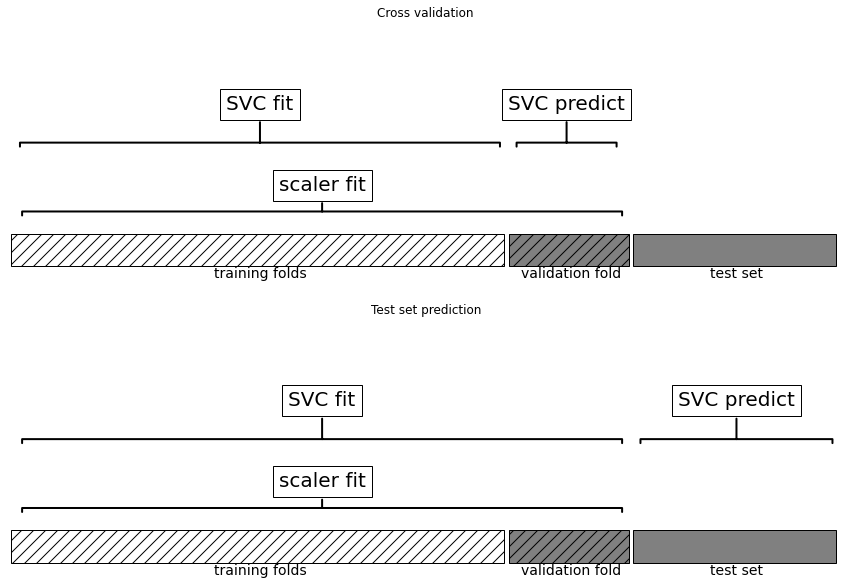

In [12]:
import mglearn
mglearn.plots.plot_improper_processing()

In [20]:
# from above cross validation figure, we already leaked information from part of the data into our modeling process
# solution to this: splitting of dataset during cross validation should be done before doing any preprocessing 

"""
    ANY PROCESS THAT EXTRACTS KNOWLEDGE FROM THE DATASET SHOULD ONLY EVER BE APPLIED TO TRAINING PORTION OF THE DATASET
    SO ANY CROSS VALIDATION SHOULD BE THE OUTERMOST LOOP IN OUR PROCESS 
"""

# to achieve this in scikit learn with cross_val_score function and GridSearchCV functin we can use pipeling function
# it allows gluing together multiple processing steps 
# pipeline class itself has fit, predict and score method
# we build a pipeline object by providing it with a list of steps
# each step is a tuple containing name and an instance of the estimators

'\n    ANY PROCESS THAT EXTRACTS KNOWLEDGE FROM THE DATASET SHOULD ONLY EVER BE APPLIED TO TRAINING PORTION OF THE DATASET\n    SO ANY CROSS VALIDATION SHOULD BE THE OUTERMOST LOOP IN OUR PROCESS \n'

In [24]:
# this is how it works
from sklearn.pipeline import Pipeline
pipe = Pipeline([('scaler', MinMaxScaler()), ('svm',SVC())])
# scaler is the instance of MinMaxScaler and svm is instance of other one -> SVC()
# we can fit the pipeline like any other scikit learn estimator

pipe.fit(X_train, y_train)
# to evluate on the test data, we can simple call pipe.score
print("Test Score is: {:.2f}".format(pipe.score(X_test, y_test)))

Test Score is: 0.97


In [27]:
param_grid = {
    'svm__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid = GridSearchCV(pipe, param_grid=param_grid, cv = 5)
grid.fit(X_train, y_train)
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))
print("Best Parameters: {}".format(grid.best_params_))

Best cross-validation accuracy: 0.98
Test set score: 0.97
Best Parameters: {'svm__C': 1, 'svm__gamma': 1}
